In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import load_model

In [2]:
df = pd.read_csv('fake_reg.csv')

In [3]:
df.head()

price     feature1     feature2
0  461.527929   999.787558   999.766096
1  548.130011   998.861615  1001.042403
2  410.297162  1000.070267   998.844015
3  540.382220   999.952251  1000.440940
4  546.024553  1000.446011  1000.338531

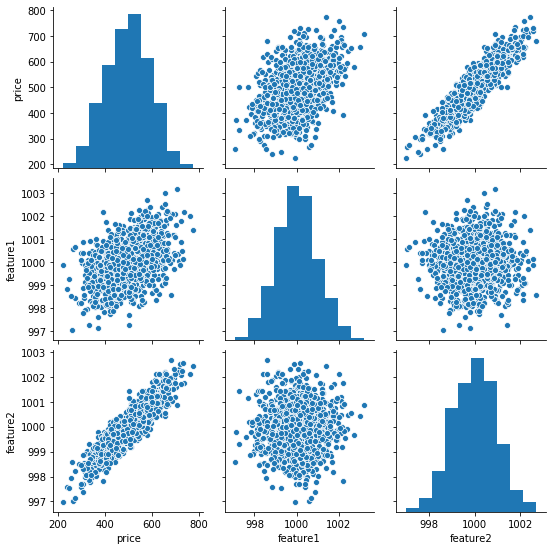

In [4]:
sns.pairplot(df)

In [5]:
X = df[['feature1','feature2']].values
y = df['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
model = Sequential()

model.add(Dense(4,activation='relu')) # 1st hidden layer
model.add(Dense(4,activation='relu')) # 2nd hidden layer
model.add(Dense(4,activation='relu')) # 3rd hidden layer

model.add(Dense(1)) # Output layer

model.compile(optimizer='rmsprop',loss='mse')

In [8]:
model.fit(x=X_train,y=y_train,epochs=250)

Train on 700 samples
Epoch 1/250
700/700 [==============================] - 2s 3ms/sample - loss: 256547.1914
Epoch 2/250
700/700 [==============================] - 0s 107us/sample - loss: 256385.9470
Epoch 3/250
700/700 [==============================] - 0s 97us/sample - loss: 256216.6387
Epoch 4/250
700/700 [==============================] - 0s 97us/sample - loss: 256026.8232
Epoch 5/250
700/700 [==============================] - 0s 99us/sample - loss: 255813.9340
Epoch 6/250
700/700 [==============================] - 0s 120us/sample - loss: 255578.4104
Epoch 7/250
700/700 [==============================] - 0s 74us/sample - loss: 255317.0970
Epoch 8/250
700/700 [==============================] - 0s 71us/sample - loss: 255028.8513
Epoch 9/250
700/700 [==============================] - 0s 90us/sample - loss: 254705.8724
Epoch 10/250
700/700 [==============================] - 0s 91us/sample - loss: 254323.7020
Epoch 11/250
700/700 [==============================] - 0s 116us/sample - los

700/700 [==============================] - 0s 74us/sample - loss: 1759.2538
Epoch 92/250
700/700 [==============================] - 0s 69us/sample - loss: 1726.2805
Epoch 93/250
700/700 [==============================] - 0s 74us/sample - loss: 1694.8785
Epoch 94/250
700/700 [==============================] - 0s 69us/sample - loss: 1662.4382
Epoch 95/250
700/700 [==============================] - 0s 64us/sample - loss: 1632.7253
Epoch 96/250
700/700 [==============================] - 0s 66us/sample - loss: 1599.0133
Epoch 97/250
700/700 [==============================] - 0s 76us/sample - loss: 1567.8159
Epoch 98/250
700/700 [==============================] - 0s 67us/sample - loss: 1533.4583
Epoch 99/250
700/700 [==============================] - 0s 64us/sample - loss: 1497.3481
Epoch 100/250
700/700 [==============================] - 0s 62us/sample - loss: 1463.3929
Epoch 101/250
700/700 [==============================] - 0s 61us/sample - loss: 1431.9707
Epoch 102/250
700/700 [=========

700/700 [==============================] - 0s 108us/sample - loss: 27.8831
Epoch 183/250
700/700 [==============================] - 0s 84us/sample - loss: 27.2942
Epoch 184/250
700/700 [==============================] - 0s 87us/sample - loss: 26.6282
Epoch 185/250
700/700 [==============================] - 0s 111us/sample - loss: 26.1919
Epoch 186/250
700/700 [==============================] - 0s 101us/sample - loss: 25.7486
Epoch 187/250
700/700 [==============================] - 0s 89us/sample - loss: 25.7210
Epoch 188/250
700/700 [==============================] - 0s 79us/sample - loss: 25.4833
Epoch 189/250
700/700 [==============================] - 0s 140us/sample - loss: 24.9525
Epoch 190/250
700/700 [==============================] - 0s 81us/sample - loss: 25.3308
Epoch 191/250
700/700 [==============================] - 0s 79us/sample - loss: 24.7706
Epoch 192/250
700/700 [==============================] - 0s 79us/sample - loss: 25.0589
Epoch 193/250
700/700 [===================

In [9]:
loss_df = pd.DataFrame(model.history.history)

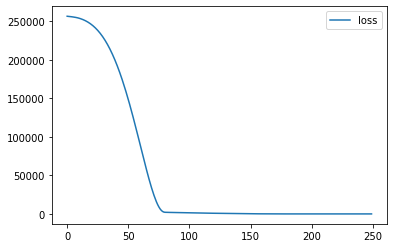

In [10]:
loss_df.plot()

In [11]:
loss_val = model.evaluate(x=X_test,y=y_test,verbose=0)
print('Test error of model is {:.2f}'.format(loss_val))

Test error of model is 26.84


In [12]:
test_predictions = model.predict(X_test)
test_predictions = pd.Series(test_predictions.reshape(300,))
pred_df = pd.DataFrame(y_test,columns=['Test true Y'])
pred_df = pd.concat([pred_df,test_predictions],axis=1)
pred_df.columns = ['Test True Y','Model predictions']

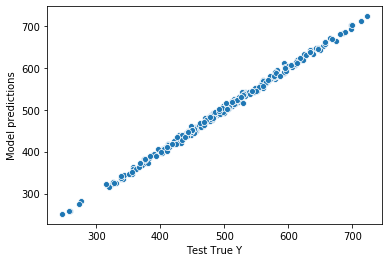

In [13]:
sns.scatterplot(x='Test True Y',y='Model predictions',data=pred_df)

In [14]:
mabse = mean_absolute_error(pred_df['Test True Y'],pred_df['Model predictions'])
print(f'Mean absolute error of model is {mabse:.2f}')

Mean absolute error of model is 4.20


In [16]:
percent_error_mean = (mabse / df['price'].mean())*100
print('Percentage error of model according to mean price is {:.2f}'.format(percent_error_mean))

Percentage error of model according to mean price is 0.84


In [17]:
msqe = mean_squared_error(pred_df['Test True Y'],pred_df['Model predictions'])**0.5
print('Mean squared error of model is {:.2f}'.format(msqe))

Mean squared error of model is 5.18


In [18]:
new_pred = [[998,1000]]
new_pred_scale = scaler.transform(new_pred)
model.predict(new_pred_scale)

array([[420.6798]], dtype=float32)

In [19]:
model.save('my_model.h5')

In [20]:
later_model = load_model('my_model.h5')

In [21]:
later_model.predict(new_pred_scale)

array([[420.6798]], dtype=float32)